In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# importing data
data = pd.read_csv('Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Converting categorical data to numeric data

In [4]:
#Complete dataset
label_encoder = preprocessing.LabelEncoder()

In [5]:
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 

In [6]:
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [7]:
data['US']= label_encoder.fit_transform(data['US']) 

In [8]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


# EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


<AxesSubplot:>

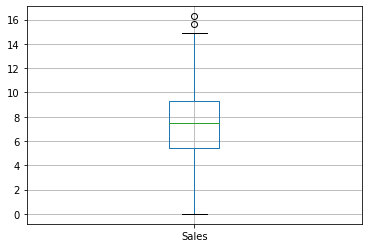

In [10]:
data.boxplot(column= ['Sales'])

<AxesSubplot:>

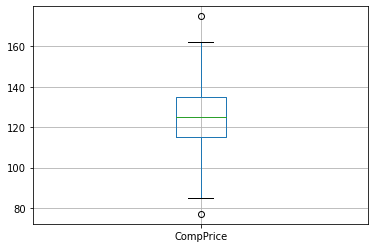

In [11]:
data.boxplot(column= ['CompPrice'])

<AxesSubplot:>

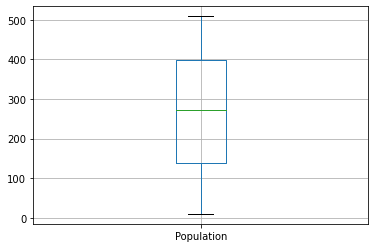

In [12]:
data.boxplot(column= ['Population'])

<AxesSubplot:>

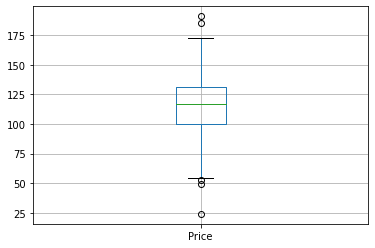

In [13]:
data.boxplot(column= ['Price'])

<AxesSubplot:>

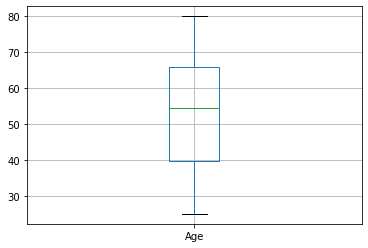

In [14]:
data.boxplot(column= ['Age'])

<AxesSubplot:>

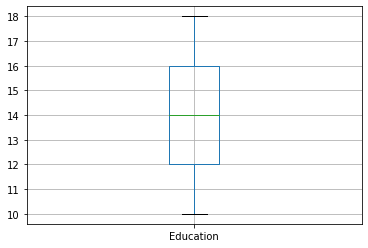

In [15]:
data.boxplot(column= ['Education'])

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

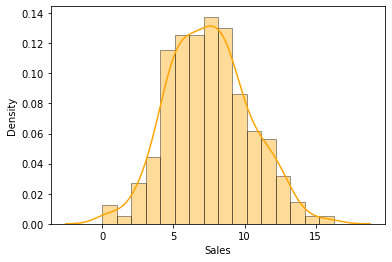

In [16]:
import seaborn as sns
sns.distplot(data['Sales'], color='orange',hist_kws =dict(edgecolor = 'black'))

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

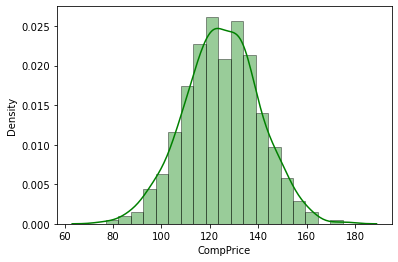

In [17]:
sns.distplot(data['CompPrice'], color='green',hist_kws =dict(edgecolor = 'black'))

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

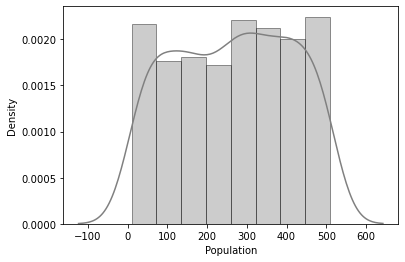

In [18]:
sns.distplot(data['Population'], color='gray',hist_kws =dict(edgecolor = 'black'))

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

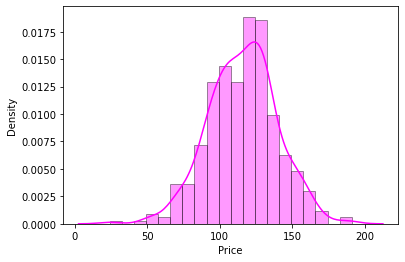

In [19]:
sns.distplot(data['Price'], color='magenta',hist_kws =dict(edgecolor = 'black'))

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

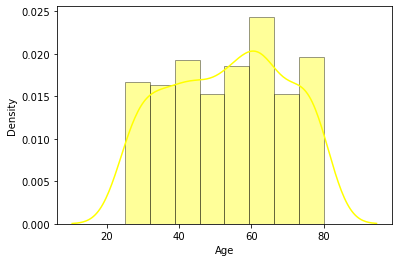

In [20]:
sns.distplot(data['Age'], color='yellow',hist_kws =dict(edgecolor = 'black'))

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education', ylabel='Density'>

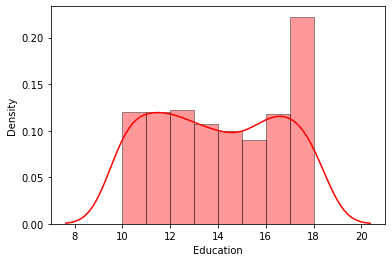

In [21]:
sns.distplot(data['Education'], color='red',hist_kws =dict(edgecolor = 'black'))

# Using CART Regressor

First

In [22]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [23]:
array = data.values
X1 = array[:,1:]
Y = array[:,0]

In [24]:
X1

array([[138.,  73.,  11., ...,  17.,   1.,   1.],
       [111.,  48.,  16., ...,  10.,   1.,   1.],
       [113.,  35.,  10., ...,  12.,   1.,   1.],
       ...,
       [162.,  26.,  12., ...,  18.,   1.,   1.],
       [100.,  79.,   7., ...,  12.,   1.,   1.],
       [134.,  37.,   0., ...,  16.,   1.,   1.]])

In [25]:
#Standardize data
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler().fit(X1)
X=scaler.transform(X1)

In [27]:
X

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  1.18444912,
         0.64686916,  0.74188112],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.4901134 ,
         0.64686916,  0.74188112],
       [-0.78189624, -1.20415947,  0.506621  , ..., -0.72595268,
         0.64686916,  0.74188112],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  1.56652948,
         0.64686916,  0.74188112],
       [-1.63071888,  0.37002211,  0.05495295, ..., -0.72595268,
         0.64686916,  0.74188112],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.80236876,
         0.64686916,  0.74188112]])

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=8)

In [29]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [30]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

9.16     5
9.39     4
4.78     3
4.12     3
8.70     3
        ..
6.37     1
8.68     1
1.82     1
10.64    1
6.03     1
Length: 86, dtype: int64

In [31]:
#Find the accuracy
model.score(X_test,Y_test)

0.4257557881204682

Second

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=9)

In [33]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [34]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

6.53     6
12.53    5
7.30     5
10.51    5
2.52     4
        ..
7.74     1
4.90     1
4.78     1
7.96     1
9.95     1
Length: 86, dtype: int64

In [35]:
#Find the accuracy
model.score(X_test,Y_test)

0.5062348054057244

Third

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [37]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [38]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

6.53     6
4.55     3
7.44     2
6.37     2
10.98    2
        ..
8.23     1
2.93     1
3.90     1
6.95     1
5.87     1
Length: 64, dtype: int64

In [39]:
#Find the accuracy
model.score(X_test,Y_test)

0.49133030195884064